✅ Accuracy: 0.9054054054054054

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.80      0.67      0.73        12
           3       1.00      0.93      0.97        15
           4       0.64      0.90      0.75        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.90        74
weighted avg       0.92      0.91      0.91        74


Confusion Matrix:
 [[22  1  0  0  0  0]
 [ 0  8  0  4  0  0]
 [ 0  0 14  1  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  4]]


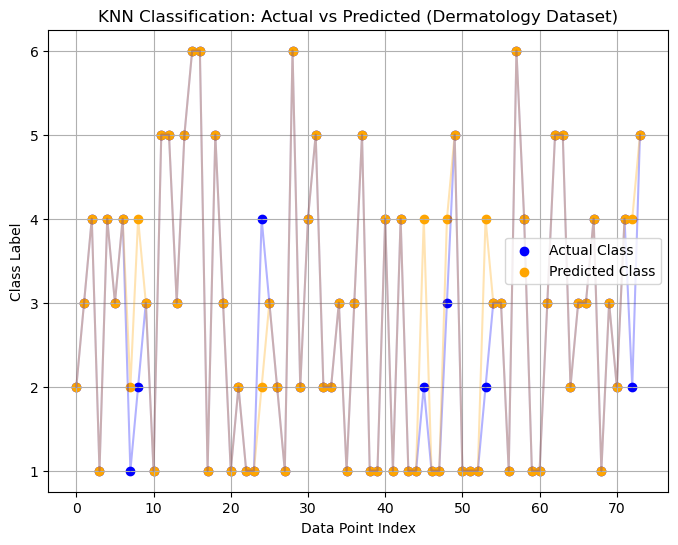

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = pd.read_csv("dermatology_database_1.csv")

# Step 2: Separate features (X) and target (y)
X = data.drop(['class'], axis=1)
y = data['class']

# Step 3: Handle missing/non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())

# Step 4: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 7: Predict on test data
y_pred = knn.predict(X_test_scaled)

# Step 8: Evaluate model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Plot Actual vs Predicted classes
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Class')
plt.scatter(range(len(y_pred)), y_pred, color='orange', label='Predicted Class')
plt.plot(range(len(y_test)), y_test, color='blue', alpha=0.3)
plt.plot(range(len(y_pred)), y_pred, color='orange', alpha=0.3)
plt.xlabel("Data Point Index")
plt.ylabel("Class Label")
plt.title("KNN Classification: Actual vs Predicted (Dermatology Dataset)")
plt.legend()
plt.grid(True)
plt.show()
